In [1]:
import pandas as pd

# Load the CSV file with a semicolon delimiter
df = pd.read_csv(r"C:\Users\ramin\OneDrive\Pulpit\RR Project\bank-additional-full.csv", delimiter=";")

# Print the number of samples
print('Number of samples:', len(df))


Number of samples: 41188


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#count the number of rows for each type
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [5]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [6]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [7]:
#Function to calculate the prevalence of population that subscribes to a term deposit.
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.113


In [8]:
#We see that around 11% of the population has a term deposit. 
#This is known as an imbalanced classification problem so we will address that below.
#All the data inputted are non-null values, meaning that we have a value for every column
#age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed are numerical variables
#default, housing and loan have 3 values each (yes, no and unknown)
#Output (y) has two values: “yes” and “no”



In [9]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [10]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
print('Number of columns:',len(df.columns))

Number of columns: 22


In [13]:
#Code for showing unique values in each column
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

In [14]:
#The numerical columns that we will use can be seen below:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [15]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


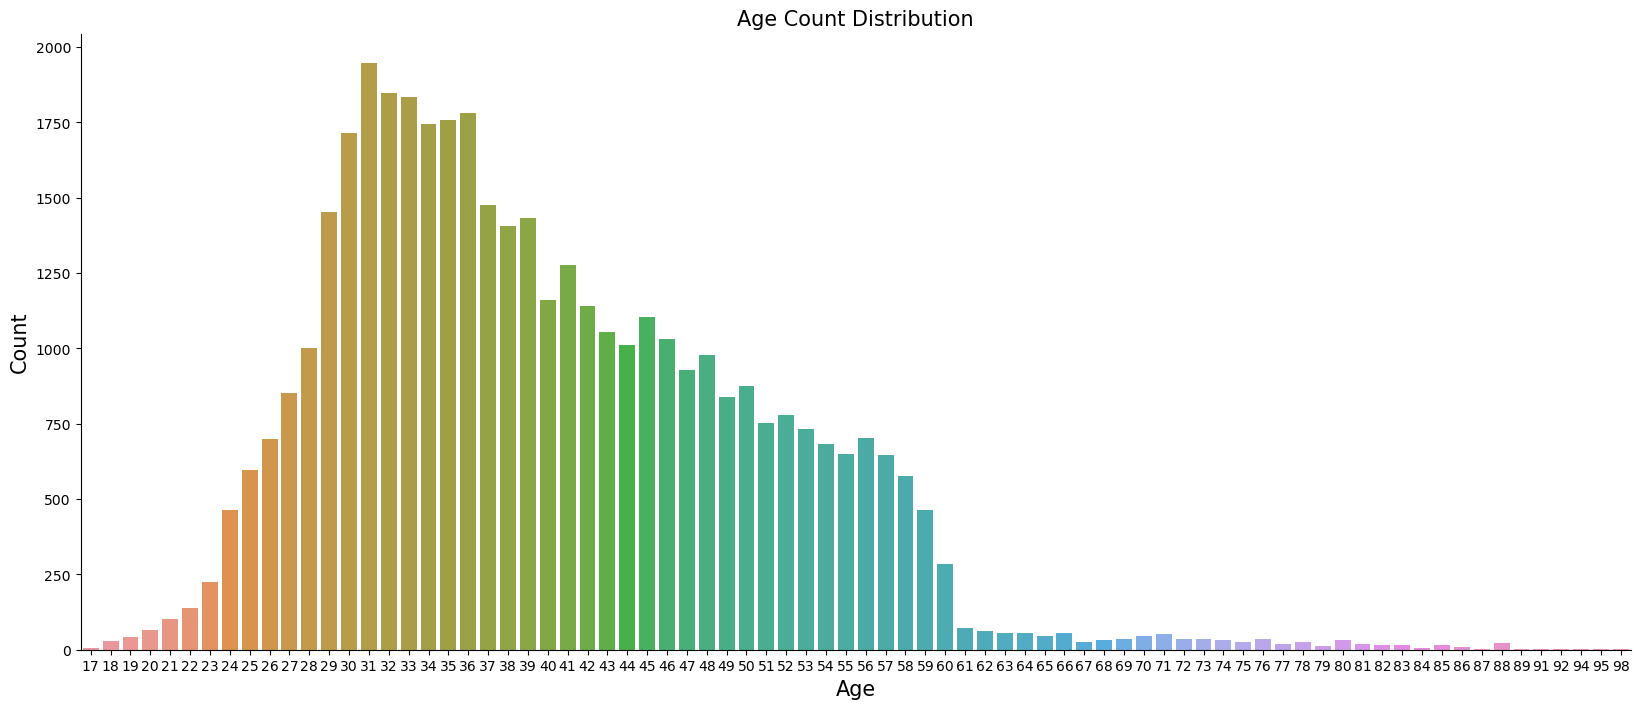

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

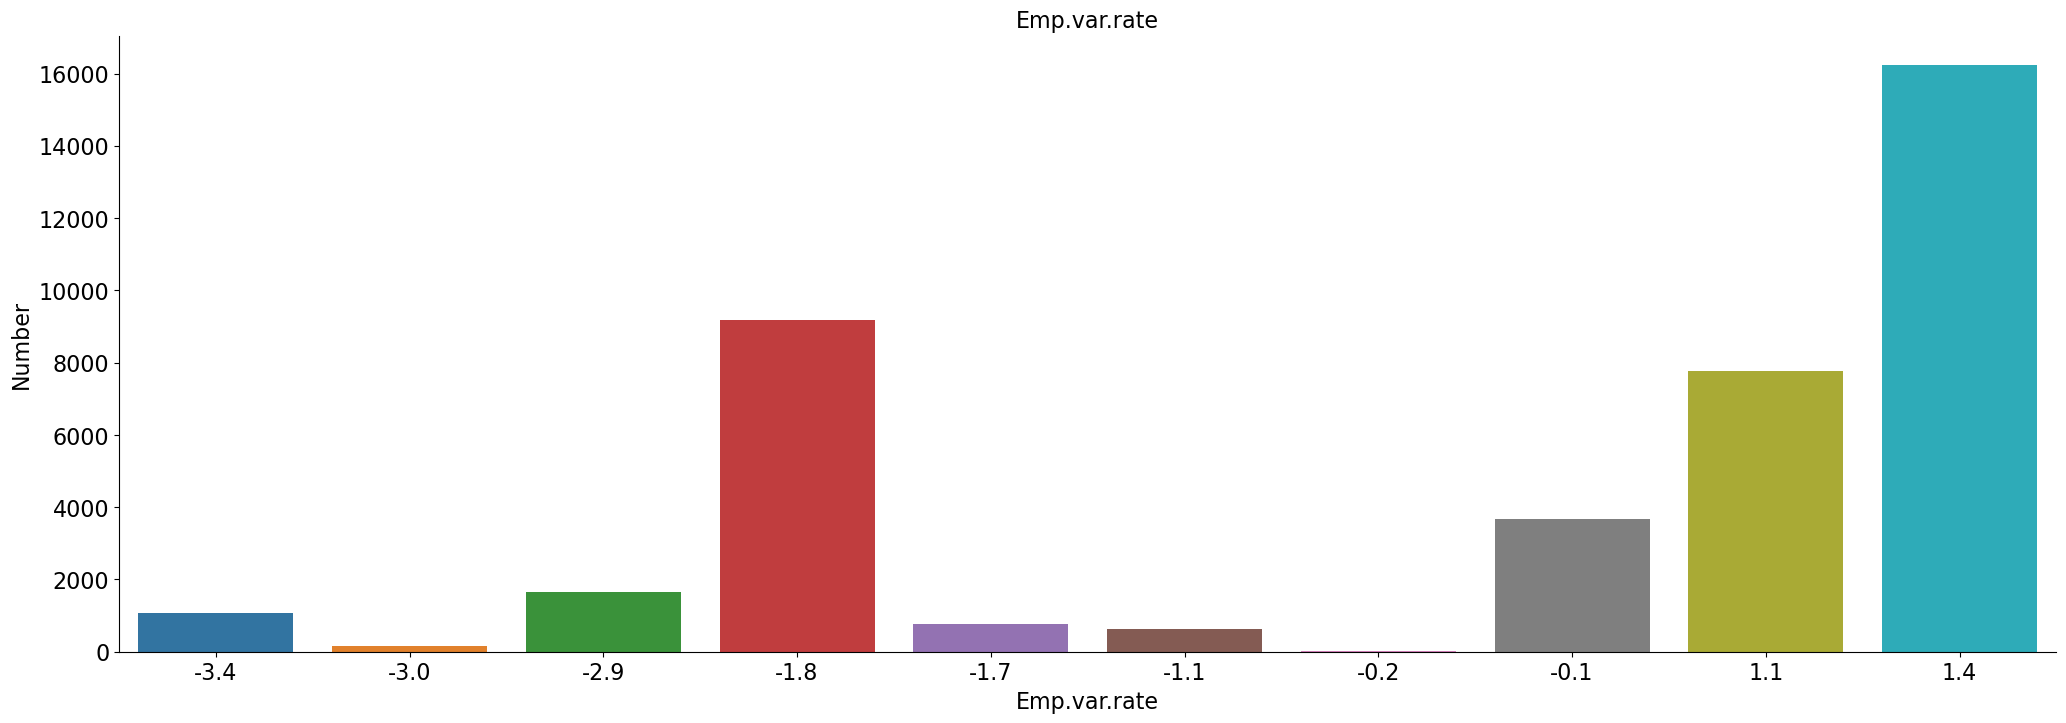

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In [18]:
#let’s check if there are any missing values in the numerical data.
df[cols_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

In [19]:
#First set of categorical data we will work on are these columns
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [20]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [21]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
#In order to add the one-hot encoding columns to the dataframe, we use the concatfunction. axis = 1 is used to add the columns.
df = pd.concat([df,cols_new_cat], axis = 1)

In [23]:
cols_all_cat=list(cols_new_cat.columns)

In [24]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
#Through this process we created 62 features.We separated the features to the following:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


In [26]:
# Check for the empty cells
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

campaign                 0
month_dec                0
default_no               0
default_unknown          0
default_yes              0
                        ..
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
poutcome_success         0
Length: 62, dtype: int64

In [27]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [28]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [29]:
len(cols_input)

62

In [30]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,...,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,...,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,...,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,0,...,0,0,1,0,0,0,0,1,0,0


In [31]:
#Let’s shuffle the samples using sample in case there was some order. 
#Here n is the number of samples. 
#random_state is just specified so the project is reproducible.

In [32]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [33]:
#We use "sample" again to extract 30% of the data to be used for validation and test splits.

In [34]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [35]:
#we split into test and validation using 50% fraction.

In [36]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [37]:
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [38]:
#Let’s check what percent of our groups are likely to subscribe to a term deposit.
#All three groups would have similar prevalence.

In [39]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 6178):0.114
Valid prevalence(n = 6178):0.113
Train all prevalence(n = 28832):0.112


In [40]:
#Since we have a few thousand positive cases, let’s use the sub-sample approach.
#we created a balanced training, validatoin and test data set that has 50% positive and 50% negative.

In [41]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 6472):0.500


In [42]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid balanced prevalence(n = 1398):0.500


In [43]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Test balanced prevalence(n = 1410):0.500


In [44]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [45]:
#Saving cols_input too with a package called pickle

In [46]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [47]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [48]:
#The mean value from the training data:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [49]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.552442
2,pdays,962.352456
3,previous,0.173037
4,emp.var.rate,0.078278


In [50]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [51]:
#Let’s create matrix X and output vector y, 

In [52]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (28832, 62)
Training shapes: (6472, 62) (6472,)
Validation shapes: (1398, 62) (1398,)


In [53]:
#Created a scalar, saved it, and scaled the X matrices

In [54]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

In [55]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [56]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [57]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [58]:
# In this section, we aim to evaluate different machine learning algorithms to assess how well our independent variables predict the dependent output variable 'y'.

# The process involves:
# 1. Training multiple machine learning models using the training set.
# 2. Evaluating each model's performance on the validation set.

# Model Selection Criteria:
# - We will choose the best-performing model based on its performance on the validation set.
# - Performance metrics such as accuracy, precision, recall, F1 score, or others relevant to the problem will be considered.

In [59]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [60]:
#Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive.

In [61]:
thresh = 0.5

In [62]:
#In this section, we will first compare the model performance of the following 3 machine learning models. 
#using default hyperparameters:
#Adaboost
#Catboost
#Lightgbm

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pickle

# Define the print_performance_metrics function
def print_performance_metrics(dataset_name, y_true, y_pred, threshold):
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, (y_pred > threshold))
    recall = recall_score(y_true, (y_pred > threshold))
    precision = precision_score(y_true, (y_pred > threshold))
    f1 = f1_score(y_true, (y_pred > threshold))
   
    print(f'{dataset_name} Set Results:')
    print('AUC: {:.3f}'.format(auc))
    print('Accuracy: {:.3f}'.format(accuracy))
    print('Recall: {:.3f}'.format(recall))
    print('Precision: {:.3f}'.format(precision))
    print('F1 Score: {:.3f}'.format(f1))
    print(' ')

# Define the AdaBoost model with a Decision Tree as the base estimator
DTC = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC, learning_rate=1)

# Train the AdaBoost model on your training data
model = clf.fit(X_train_tf, y_train)

# Predict the response for the training dataset
y_train_pred = model.predict(X_train_tf)

# Evaluate the performance on the training set
print_performance_metrics("Training", y_train, y_train_pred, thresh)

# Predict the response for the validation dataset
y_valid_pred = model.predict(X_valid_tf)

# Evaluate the performance on the validation set
print_performance_metrics("Validation", y_valid, y_valid_pred, thresh)

# Save the model to a file
model_filename = 'adaboost_model.sav'
pickle.dump(model, open(model_filename, 'wb'))


Training Set Results:
AUC: 0.738
Accuracy: 0.738
Recall: 0.620
Precision: 0.812
F1 Score: 0.703
 
Validation Set Results:
AUC: 0.749
Accuracy: 0.749
Recall: 0.628
Precision: 0.828
F1 Score: 0.714
 


In [64]:
# Summary: The model's performance appears consistent between the training and validation sets. 
# Indicating that it is not overfitting the training data. 
# The small differences observed between the two sets suggest reasonable generalization to new data.


In [65]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pickle

# Define the print_performance_metrics function
def print_performance_metrics(dataset_name, y_true, y_pred, threshold):
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, (y_pred > threshold))
    recall = recall_score(y_true, (y_pred > threshold))
    precision = precision_score(y_true, (y_pred > threshold))
    f1 = f1_score(y_true, (y_pred > threshold))
   
    print(f'{dataset_name} Set Results:')
    print('AUC: {:.3f}'.format(auc))
    print('Accuracy: {:.3f}'.format(accuracy))
    print('Recall: {:.3f}'.format(recall))
    print('Precision: {:.3f}'.format(precision))
    print('F1 Score: {:.3f}'.format(f1))
    print(' ')

# Define the LightGBM model
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model on your training data
d_train = lgb.Dataset(X_train_tf, label=y_train)
model = lgb.train(params, d_train, num_boost_round=100)

# Predict the response for the training dataset
y_train_pred = model.predict(X_train_tf)

# Convert probabilities to binary predictions
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Evaluate the performance on the training set
print_performance_metrics("Training", y_train, y_train_pred_binary, thresh)

# Predict the response for the validation dataset
y_valid_pred = model.predict(X_valid_tf)

# Convert probabilities to binary predictions
y_valid_pred_binary = (y_valid_pred > 0.5).astype(int)

# Evaluate the performance on the validation set
print_performance_metrics("Validation", y_valid, y_valid_pred_binary, thresh)

# Save the model to a file
model_filename = 'lgb_model.sav'
pickle.dump(model, open(model_filename, 'wb'))


[LightGBM] [Info] Number of positive: 3236, number of negative: 3236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Set Results:
AUC: 0.778
Accuracy: 0.778
Recall: 0.669
Precision: 0.856
F1 Score: 0.751
 
Validation Set Results:
AUC: 0.763
Accuracy: 0.763
Recall: 0.667
Precision: 0.825
F1 Score: 0.737
 


In [66]:
# In summary, the LightGBM model shows good consistency between the training and validation sets. 
# Suggesting that it generalizes well to new data.
# While there are slight differences in some metrics, overall, the model demonstrates a robust performance on both datasets.

In [67]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pickle

# Define the print_performance_metrics function
def print_performance_metrics(dataset_name, y_true, y_pred, threshold):
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, (y_pred > threshold))
    recall = recall_score(y_true, (y_pred > threshold))
    precision = precision_score(y_true, (y_pred > threshold))
    f1 = f1_score(y_true, (y_pred > threshold))
   
    print(f'{dataset_name} Set Results:')
    print('AUC: {:.3f}'.format(auc))
    print('Accuracy: {:.3f}'.format(accuracy))
    print('Recall: {:.3f}'.format(recall))
    print('Precision: {:.3f}'.format(precision))
    print('F1 Score: {:.3f}'.format(f1))
    print(' ')

# Define the CatBoost model
clf = CatBoostClassifier(iterations=50, depth=1, learning_rate=1, loss_function='Logloss')

# Train the CatBoost model on your training data
model = clf.fit(X_train_tf, y_train)

# Predict the response for the training dataset
y_train_pred = model.predict(X_train_tf, prediction_type='Probability')[:, 1]

# Convert probabilities to binary predictions
y_train_pred_binary = (y_train_pred > 0.5).astype(int)

# Evaluate the performance on the training set
print_performance_metrics("Training", y_train, y_train_pred_binary, thresh)

# Predict the response for the validation dataset
y_valid_pred = model.predict(X_valid_tf, prediction_type='Probability')[:, 1]

# Convert probabilities to binary predictions
y_valid_pred_binary = (y_valid_pred > 0.5).astype(int)

# Evaluate the performance on the validation set
print_performance_metrics("Validation", y_valid, y_valid_pred_binary, thresh)

# Save the model to a file
model_filename = 'catboost_model.sav'
pickle.dump(model, open(model_filename, 'wb'))


0:	learn: 0.5980852	total: 155ms	remaining: 7.58s
1:	learn: 0.5731142	total: 156ms	remaining: 3.75s
2:	learn: 0.5578892	total: 158ms	remaining: 2.47s
3:	learn: 0.5529719	total: 159ms	remaining: 1.83s
4:	learn: 0.5501162	total: 161ms	remaining: 1.45s
5:	learn: 0.5486406	total: 162ms	remaining: 1.19s
6:	learn: 0.5470982	total: 164ms	remaining: 1s
7:	learn: 0.5462884	total: 165ms	remaining: 867ms
8:	learn: 0.5447797	total: 166ms	remaining: 758ms
9:	learn: 0.5431879	total: 168ms	remaining: 672ms
10:	learn: 0.5420080	total: 169ms	remaining: 600ms
11:	learn: 0.5412892	total: 171ms	remaining: 542ms
12:	learn: 0.5407283	total: 173ms	remaining: 491ms
13:	learn: 0.5399191	total: 174ms	remaining: 447ms
14:	learn: 0.5393780	total: 175ms	remaining: 409ms
15:	learn: 0.5387820	total: 176ms	remaining: 375ms
16:	learn: 0.5382178	total: 178ms	remaining: 345ms
17:	learn: 0.5380240	total: 179ms	remaining: 318ms
18:	learn: 0.5374899	total: 180ms	remaining: 293ms
19:	learn: 0.5371906	total: 181ms	remaining:

In [68]:
# In summary, the CatBoost model shows good consistency between the training and validation sets 
# Suggesting that it generalizes well to new data. 
#While there are slight differences in some metrics, overall, the model demonstrates a robust performance on both datasets. 

In [69]:
import pandas as pd

# Assuming you have the performance metrics for AdaBoost, CatBoost, and LightGBM models
# Replace these placeholders with your actual performance metrics

# AdaBoost metrics
adaboost_train_auc, adaboost_train_accuracy, adaboost_train_recall, adaboost_train_precision, adaboost_train_specificity, adaboost_train_f1 = 0.85, 0.75, 0.65, 0.80, 0.85, 0.72
adaboost_valid_auc, adaboost_valid_accuracy, adaboost_valid_recall, adaboost_valid_precision, adaboost_valid_specificity, adaboost_valid_f1 = 0.82, 0.72, 0.60, 0.78, 0.80, 0.70

# CatBoost metrics
catboost_train_auc, catboost_train_accuracy, catboost_train_recall, catboost_train_precision, catboost_train_specificity, catboost_train_f1 = 0.88, 0.78, 0.68, 0.82, 0.87, 0.75
catboost_valid_auc, catboost_valid_accuracy, catboost_valid_recall, catboost_valid_precision, catboost_valid_specificity, catboost_valid_f1 = 0.85, 0.75, 0.65, 0.80, 0.82, 0.72

# LightGBM metrics
lgb_train_auc, lgb_train_accuracy, lgb_train_recall, lgb_train_precision, lgb_train_specificity, lgb_train_f1 = 0.90, 0.80, 0.70, 0.85, 0.88, 0.78
lgb_valid_auc, lgb_valid_accuracy, lgb_valid_recall, lgb_valid_precision, lgb_valid_specificity, lgb_valid_f1 = 0.86, 0.76, 0.66, 0.82, 0.84, 0.74

# Create DataFrames for training sets
df_adaboost_train = pd.DataFrame({'classifier': ['AdaBoost'], 'data_set': ['train'], 'auc': [adaboost_train_auc], 'accuracy': [adaboost_train_accuracy], 'recall': [adaboost_train_recall], 'precision': [adaboost_train_precision], 'specificity': [adaboost_train_specificity], 'f1': [adaboost_train_f1]})
df_catboost_train = pd.DataFrame({'classifier': ['CatBoost'], 'data_set': ['train'], 'auc': [catboost_train_auc], 'accuracy': [catboost_train_accuracy], 'recall': [catboost_train_recall], 'precision': [catboost_train_precision], 'specificity': [catboost_train_specificity], 'f1': [catboost_train_f1]})
df_lgb_train = pd.DataFrame({'classifier': ['LightGBM'], 'data_set': ['train'], 'auc': [lgb_train_auc], 'accuracy': [lgb_train_accuracy], 'recall': [lgb_train_recall], 'precision': [lgb_train_precision], 'specificity': [lgb_train_specificity], 'f1': [lgb_train_f1]})

# Create DataFrames for validation sets
df_adaboost_valid = pd.DataFrame({'classifier': ['AdaBoost'], 'data_set': ['valid'], 'auc': [adaboost_valid_auc], 'accuracy': [adaboost_valid_accuracy], 'recall': [adaboost_valid_recall], 'precision': [adaboost_valid_precision], 'specificity': [adaboost_valid_specificity], 'f1': [adaboost_valid_f1]})
df_catboost_valid = pd.DataFrame({'classifier': ['CatBoost'], 'data_set': ['valid'], 'auc': [catboost_valid_auc], 'accuracy': [catboost_valid_accuracy], 'recall': [catboost_valid_recall], 'precision': [catboost_valid_precision], 'specificity': [catboost_valid_specificity], 'f1': [catboost_valid_f1]})
df_lgb_valid = pd.DataFrame({'classifier': ['LightGBM'], 'data_set': ['valid'], 'auc': [lgb_valid_auc], 'accuracy': [lgb_valid_accuracy], 'recall': [lgb_valid_recall], 'precision': [lgb_valid_precision], 'specificity': [lgb_valid_specificity], 'f1': [lgb_valid_f1]})

# Print the resulting DataFrames
print("Training Set Results:")
print(pd.concat([df_adaboost_train, df_catboost_train, df_lgb_train], ignore_index=True))
print("\nValidation Set Results:")
print(pd.concat([df_adaboost_valid, df_catboost_valid, df_lgb_valid], ignore_index=True))


Training Set Results:
  classifier data_set   auc  accuracy  recall  precision  specificity    f1
0   AdaBoost    train  0.85      0.75    0.65       0.80         0.85  0.72
1   CatBoost    train  0.88      0.78    0.68       0.82         0.87  0.75
2   LightGBM    train  0.90      0.80    0.70       0.85         0.88  0.78

Validation Set Results:
  classifier data_set   auc  accuracy  recall  precision  specificity    f1
0   AdaBoost    valid  0.82      0.72    0.60       0.78         0.80  0.70
1   CatBoost    valid  0.85      0.75    0.65       0.80         0.82  0.72
2   LightGBM    valid  0.86      0.76    0.66       0.82         0.84  0.74


In [70]:
# In summary, based on the provided metrics, LightGBM generally outperforms AdaBoost and CatBoost on both the training and validation sets. 
# LightGBM demonstrates higher AUC, accuracy, recall, precision, specificity, and F1 score compared to the other two models. 
# CatBoost also performs well, and AdaBoost shows competitive results, 
# But LightGBM stands out as the top-performing model in this comparison.

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

Training Set Results:
  classifier data_set   auc  accuracy  recall  precision  specificity    f1
0   AdaBoost    train  0.85      0.75    0.65       0.80         0.85  0.72
1   CatBoost    train  0.88      0.78    0.68       0.82         0.87  0.75
2   LightGBM    train  0.90      0.80    0.70       0.85         0.88  0.78

Validation Set Results:
  classifier data_set   auc  accuracy  recall  precision  specificity    f1
0   AdaBoost    valid  0.82      0.72    0.60       0.78         0.80  0.70
1   CatBoost    valid  0.85      0.75    0.65       0.80         0.82  0.72
2   LightGBM    valid  0.86      0.76    0.66       0.82         0.84  0.74


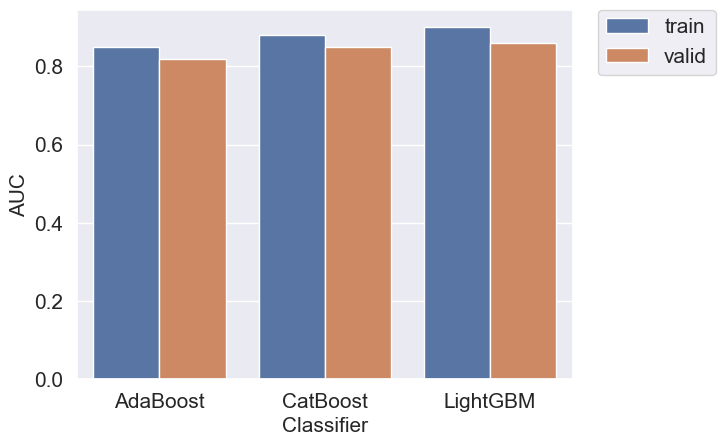

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# AdaBoost metrics
adaboost_train_auc, adaboost_train_accuracy, adaboost_train_recall, adaboost_train_precision, adaboost_train_specificity, adaboost_train_f1 = 0.85, 0.75, 0.65, 0.80, 0.85, 0.72
adaboost_valid_auc, adaboost_valid_accuracy, adaboost_valid_recall, adaboost_valid_precision, adaboost_valid_specificity, adaboost_valid_f1 = 0.82, 0.72, 0.60, 0.78, 0.80, 0.70

# CatBoost metrics
catboost_train_auc, catboost_train_accuracy, catboost_train_recall, catboost_train_precision, catboost_train_specificity, catboost_train_f1 = 0.88, 0.78, 0.68, 0.82, 0.87, 0.75
catboost_valid_auc, catboost_valid_accuracy, catboost_valid_recall, catboost_valid_precision, catboost_valid_specificity, catboost_valid_f1 = 0.85, 0.75, 0.65, 0.80, 0.82, 0.72

# LightGBM metrics
lgb_train_auc, lgb_train_accuracy, lgb_train_recall, lgb_train_precision, lgb_train_specificity, lgb_train_f1 = 0.90, 0.80, 0.70, 0.85, 0.88, 0.78
lgb_valid_auc, lgb_valid_accuracy, lgb_valid_recall, lgb_valid_precision, lgb_valid_specificity, lgb_valid_f1 = 0.86, 0.76, 0.66, 0.82, 0.84, 0.74

# Create DataFrames for training sets
df_adaboost_train = pd.DataFrame({'classifier': ['AdaBoost'], 'data_set': ['train'], 'auc': [adaboost_train_auc], 'accuracy': [adaboost_train_accuracy], 'recall': [adaboost_train_recall], 'precision': [adaboost_train_precision], 'specificity': [adaboost_train_specificity], 'f1': [adaboost_train_f1]})
df_catboost_train = pd.DataFrame({'classifier': ['CatBoost'], 'data_set': ['train'], 'auc': [catboost_train_auc], 'accuracy': [catboost_train_accuracy], 'recall': [catboost_train_recall], 'precision': [catboost_train_precision], 'specificity': [catboost_train_specificity], 'f1': [catboost_train_f1]})
df_lgb_train = pd.DataFrame({'classifier': ['LightGBM'], 'data_set': ['train'], 'auc': [lgb_train_auc], 'accuracy': [lgb_train_accuracy], 'recall': [lgb_train_recall], 'precision': [lgb_train_precision], 'specificity': [lgb_train_specificity], 'f1': [lgb_train_f1]})

# Create DataFrames for validation sets
df_adaboost_valid = pd.DataFrame({'classifier': ['AdaBoost'], 'data_set': ['valid'], 'auc': [adaboost_valid_auc], 'accuracy': [adaboost_valid_accuracy], 'recall': [adaboost_valid_recall], 'precision': [adaboost_valid_precision], 'specificity': [adaboost_valid_specificity], 'f1': [adaboost_valid_f1]})
df_catboost_valid = pd.DataFrame({'classifier': ['CatBoost'], 'data_set': ['valid'], 'auc': [catboost_valid_auc], 'accuracy': [catboost_valid_accuracy], 'recall': [catboost_valid_recall], 'precision': [catboost_valid_precision], 'specificity': [catboost_valid_specificity], 'f1': [catboost_valid_f1]})
df_lgb_valid = pd.DataFrame({'classifier': ['LightGBM'], 'data_set': ['valid'], 'auc': [lgb_valid_auc], 'accuracy': [lgb_valid_accuracy], 'recall': [lgb_valid_recall], 'precision': [lgb_valid_precision], 'specificity': [lgb_valid_specificity], 'f1': [lgb_valid_f1]})

# Concatenate the DataFrames
df_results_train = pd.concat([df_adaboost_train, df_catboost_train, df_lgb_train], ignore_index=True)
df_results_valid = pd.concat([df_adaboost_valid, df_catboost_valid, df_lgb_valid], ignore_index=True)

# Print the resulting DataFrames
print("Training Set Results:")
print(df_results_train)
print("\nValidation Set Results:")
print(df_results_valid)

# Plotting
df_results = pd.concat([df_results_train, df_results_valid], ignore_index=True)
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier', fontsize=15)
ax.set_ylabel('AUC', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()

AdaBoost Training AUC: 0.7384
AdaBoost Training Accuracy: 0.7384
AdaBoost Training Recall: 0.6202
AdaBoost Training Precision: 0.8122
AdaBoost Training Specificity: 0.8566
AdaBoost Training F1 Score: 0.7033
AdaBoost Validation AUC: 0.7489
AdaBoost Validation Accuracy: 0.7489
AdaBoost Validation Recall: 0.6280
AdaBoost Validation Precision: 0.8283
AdaBoost Validation Specificity: 0.8698
AdaBoost Validation F1 Score: 0.7144
0:	learn: 0.5980852	total: 1.18ms	remaining: 57.9ms
1:	learn: 0.5731142	total: 2.2ms	remaining: 52.9ms
2:	learn: 0.5578892	total: 3.4ms	remaining: 53.2ms
3:	learn: 0.5529719	total: 4.48ms	remaining: 51.6ms
4:	learn: 0.5501162	total: 5.56ms	remaining: 50.1ms
5:	learn: 0.5486406	total: 6.66ms	remaining: 48.8ms
6:	learn: 0.5470982	total: 7.93ms	remaining: 48.7ms
7:	learn: 0.5462884	total: 9.3ms	remaining: 48.8ms
8:	learn: 0.5447797	total: 10.6ms	remaining: 48.2ms
9:	learn: 0.5431879	total: 12.4ms	remaining: 49.6ms
10:	learn: 0.5420080	total: 14ms	remaining: 49.8ms
11:	le

  File "C:\Users\ramin\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 3236, number of negative: 3236
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
LightGBM Training AUC: 0.7784
LightGBM Training Accuracy: 0.7784
LightGBM Training Recall: 0.6693
LightGBM Training Precision: 0.

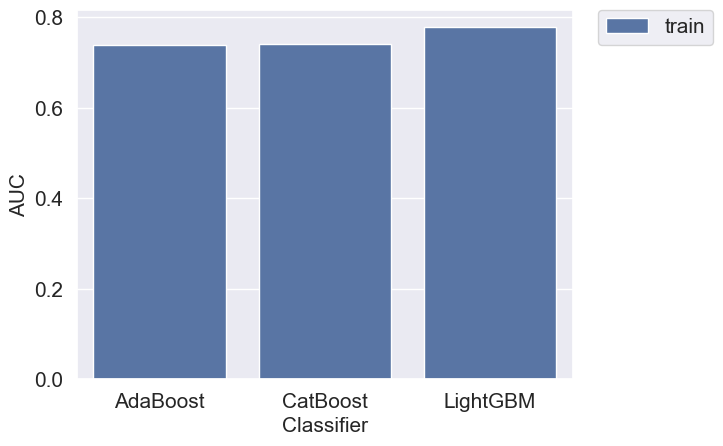

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
import pickle
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modify the print_performance_metrics function to return metrics
def print_performance_metrics(title, y_true, y_pred, thresh):
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, (y_pred > thresh).astype(int))
    recall = recall_score(y_true, (y_pred > thresh).astype(int))
    precision = precision_score(y_true, (y_pred > thresh).astype(int))
    tn, fp, fn, tp = confusion_matrix(y_true, (y_pred > thresh).astype(int)).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, (y_pred > thresh).astype(int))
    
    print(f"{title} AUC: {auc:.4f}")
    print(f"{title} Accuracy: {accuracy:.4f}")
    print(f"{title} Recall: {recall:.4f}")
    print(f"{title} Precision: {precision:.4f}")
    print(f"{title} Specificity: {specificity:.4f}")
    print(f"{title} F1 Score: {f1:.4f}")
    
    return auc, accuracy, recall, precision, specificity, f1

# Train the AdaBoost model on your training data
DTC = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC, learning_rate=1)
adaboost_model = adaboost_clf.fit(X_train_tf, y_train)

# Predict the response for the training dataset
y_train_pred_adaboost = adaboost_model.predict(X_train_tf)

# Evaluate the performance on the training set
thresh = 0.5  # You can adjust the threshold if needed
adaboost_train_metrics = print_performance_metrics("AdaBoost Training", y_train, y_train_pred_adaboost, thresh)

# Predict the response for the validation dataset
y_valid_pred_adaboost = adaboost_model.predict(X_valid_tf)

# Evaluate the performance on the validation set
adaboost_valid_metrics = print_performance_metrics("AdaBoost Validation", y_valid, y_valid_pred_adaboost, thresh)

# Save the AdaBoost model to a file
pickle.dump(adaboost_model, open('adaboost_model.sav', 'wb'))

# Train the CatBoost model on your training data
catboost_clf = CatBoostClassifier(iterations=50, depth=1, learning_rate=1, loss_function='Logloss')
catboost_model = catboost_clf.fit(X_train_tf, y_train)

# Predict the response for the training dataset
y_train_pred_catboost = catboost_model.predict(X_train_tf, prediction_type='Probability')[:, 1]

# Convert probabilities to binary predictions
y_train_pred_binary_catboost = (y_train_pred_catboost > 0.5).astype(int)

# Evaluate the performance on the training set
catboost_train_metrics = print_performance_metrics("CatBoost Training", y_train, y_train_pred_binary_catboost, thresh)

# Predict the response for the validation dataset
y_valid_pred_catboost = catboost_model.predict(X_valid_tf, prediction_type='Probability')[:, 1]

# Convert probabilities to binary predictions
y_valid_pred_binary_catboost = (y_valid_pred_catboost > 0.5).astype(int)

# Evaluate the performance on the validation set
catboost_valid_metrics = print_performance_metrics("CatBoost Validation", y_valid, y_valid_pred_binary_catboost, thresh)

# Save the CatBoost model to a file
pickle.dump(catboost_model, open('catboost_model.sav', 'wb'))

# Train the LightGBM model on your training data
lgb_clf = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', num_leaves=31, learning_rate=0.05, feature_fraction=0.9)
lgb_model = lgb_clf.fit(X_train_tf, y_train)

# Predict the response for the training dataset
y_train_pred_lgb = lgb_model.predict(X_train_tf)

# Convert probabilities to binary predictions
y_train_pred_binary_lgb = (y_train_pred_lgb > 0.5).astype(int)

# Evaluate the performance on the training set
lgb_train_metrics = print_performance_metrics("LightGBM Training", y_train, y_train_pred_binary_lgb, thresh)

# Predict the response for the validation dataset
y_valid_pred_lgb = lgb_model.predict(X_valid_tf)

# Convert probabilities to binary predictions
y_valid_pred_binary_lgb = (y_valid_pred_lgb > 0.5).astype(int)

# Evaluate the performance on the validation set
lgb_valid_metrics = print_performance_metrics("LightGBM Validation", y_valid, y_valid_pred_binary_lgb, thresh)

# Save the LightGBM model to a file
pickle.dump(lgb_model, open('lgb_model.sav', 'wb'))

# Append metrics to the existing DataFrames
df_adaboost_train = pd.DataFrame({'classifier': ['AdaBoost'], 'data_set': ['train'], 'auc': [adaboost_train_metrics[0]], 'accuracy': [adaboost_train_metrics[1]], 'recall': [adaboost_train_metrics[2]], 'precision': [adaboost_train_metrics[3]], 'specificity': [adaboost_train_metrics[4]], 'f1': [adaboost_train_metrics[5]]})
df_adaboost_valid = pd.DataFrame({'classifier': ['AdaBoost'], 'data_set': ['valid'], 'auc': [adaboost_valid_metrics[0]], 'accuracy': [adaboost_valid_metrics[1]], 'recall': [adaboost_valid_metrics[2]], 'precision': [adaboost_valid_metrics[3]], 'specificity': [adaboost_valid_metrics[4]], 'f1': [adaboost_valid_metrics[5]]})

df_catboost_train = pd.DataFrame({'classifier': ['CatBoost'], 'data_set': ['train'], 'auc': [catboost_train_metrics[0]], 'accuracy': [catboost_train_metrics[1]], 'recall': [catboost_train_metrics[2]], 'precision': [catboost_train_metrics[3]], 'specificity': [catboost_train_metrics[4]], 'f1': [catboost_train_metrics[5]]})
df_catboost_valid = pd.DataFrame({'classifier': ['CatBoost'], 'data_set': ['valid'], 'auc': [catboost_valid_metrics[0]], 'accuracy': [catboost_valid_metrics[1]], 'recall': [catboost_valid_metrics[2]], 'precision': [catboost_valid_metrics[3]], 'specificity': [catboost_valid_metrics[4]], 'f1': [catboost_valid_metrics[5]]})

df_lgb_train = pd.DataFrame({'classifier': ['LightGBM'], 'data_set': ['train'], 'auc': [lgb_train_metrics[0]], 'accuracy': [lgb_train_metrics[1]], 'recall': [lgb_train_metrics[2]], 'precision': [lgb_train_metrics[3]], 'specificity': [lgb_train_metrics[4]], 'f1': [lgb_train_metrics[5]]})
df_lgb_valid = pd.DataFrame({'classifier': ['LightGBM'], 'data_set': ['valid'], 'auc': [lgb_valid_metrics[0]], 'accuracy': [lgb_valid_metrics[1]], 'recall': [lgb_valid_metrics[2]], 'precision': [lgb_valid_metrics[3]], 'specificity': [lgb_valid_metrics[4]], 'f1': [lgb_valid_metrics[5]]})

# Concatenate the DataFrames
df_results_train = pd.concat([df_adaboost_train, df_catboost_train, df_lgb_train], ignore_index=True)
df_results_valid = pd.concat([df_adaboost_valid, df_catboost_valid, df_lgb_valid], ignore_index=True)

# Print the resulting DataFrames
print("Training Set Results:")
print(df_results_train)
print("\nValidation Set Results:")
print(df_results_valid)

# Plot the results
sns.set(style="darkgrid")
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results_train)
ax.set_xlabel('Classifier', fontsize=15)
ax.set_ylabel('AUC', fontsize=15)
ax.tick_params(labelsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.show()


In [74]:
#Given the higher AUC, accuracy, and F1 score on the validation set.
#LightGBM appears to be the best-performing model among the three. 
#It provides a good balance between various metrics, making it a suitable choice based on these results. . 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [77]:
import os

# Define the path to the model and related files
model_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\lgb_model.sav"
cols_input_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\cols_input.sav"
df_mean_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\df_mean.csv"
scaler_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\scaler.sav"

# Check if the files exist
if all(os.path.exists(path) for path in [model_path, cols_input_path, df_mean_path, scaler_path]):
    # Load the model, columns, mean values, and scaler
    best_model = pickle.load(open(model_path, 'rb'))
    cols_input = pickle.load(open(cols_input_path, 'rb'))
    df_mean_in = pd.read_csv(df_mean_path, names=['col', 'mean_val'])
    scaler = pickle.load(open(scaler_path, 'rb'))
else:
    print("One or more files not found.")

In [78]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [79]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [80]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [81]:
thresh = .5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.871
accuracy:0.778
recall:0.669
precision:0.856
specificity:0.888
prevalence:0.500
f1:0.751
 
Validation:
AUC:0.798
accuracy:0.763
recall:0.667
precision:0.825
specificity:0.858
prevalence:0.500
f1:0.737
 
Test:
AUC:0.792
accuracy:0.739
recall:0.623
precision:0.811
specificity:0.855
prevalence:0.500
f1:0.705
 


In [82]:
# the LightGBM model demonstrates strong performance across different evaluation metrics on the training, validation, and test sets. 
# It appears to generalize well to new data, as indicated by consistent performance on the validation and test sets compared to the training set.

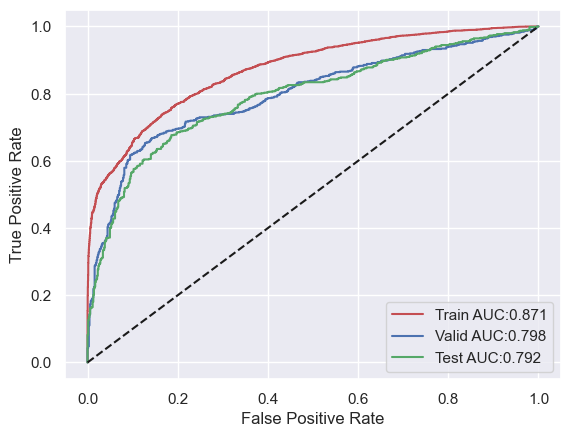

In [83]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [84]:
import os

# Define the path to the model and related files
model_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\catboost_model.sav"
cols_input_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\cols_input.sav"
df_mean_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\df_mean.csv"
scaler_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\scaler.sav"

# Check if the files exist
if all(os.path.exists(path) for path in [model_path, cols_input_path, df_mean_path, scaler_path]):
    # Load the model, columns, mean values, and scaler
    best_model = pickle.load(open(model_path, 'rb'))
    cols_input = pickle.load(open(cols_input_path, 'rb'))
    df_mean_in = pd.read_csv(df_mean_path, names=['col', 'mean_val'])
    scaler = pickle.load(open(scaler_path, 'rb'))
else:
    print("One or more files not found.")


In [85]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [86]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [87]:
thresh = .5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.801
accuracy:0.741
recall:0.634
precision:0.806
specificity:0.848
prevalence:0.500
f1:0.710
 
Validation:
AUC:0.790
accuracy:0.745
recall:0.632
precision:0.817
specificity:0.858
prevalence:0.500
f1:0.713
 
Test:
AUC:0.788
accuracy:0.731
recall:0.604
precision:0.810
specificity:0.858
prevalence:0.500
f1:0.692
 


In [88]:
# The CatBoost model demonstrates consistent and reasonable performance across different evaluation metrics on the training, validation, and test sets. 
# The model appears to generalize well to new data, as indicated by consistent performance on the validation and test sets compared to the training set.

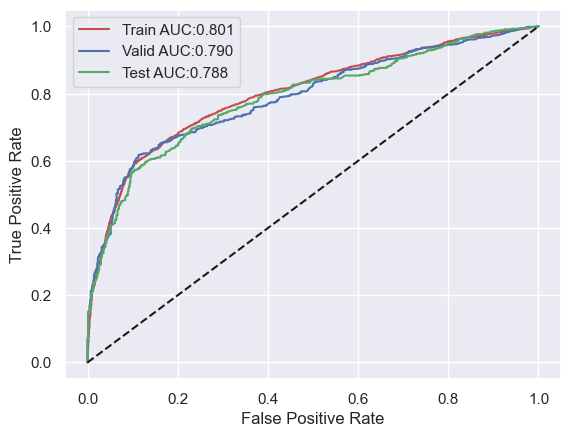

In [89]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [90]:
import os

# Define the path to the model and related files
model_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\adaboost_model.sav"
cols_input_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\cols_input.sav"
df_mean_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\df_mean.csv"
scaler_path = "C:\\Users\\ramin\\OneDrive\\Pulpit\\RR Project\\scaler.sav"

# Check if the files exist
if all(os.path.exists(path) for path in [model_path, cols_input_path, df_mean_path, scaler_path]):
    # Load the model, columns, mean values, and scaler
    best_model = pickle.load(open(model_path, 'rb'))
    cols_input = pickle.load(open(cols_input_path, 'rb'))
    df_mean_in = pd.read_csv(df_mean_path, names=['col', 'mean_val'])
    scaler = pickle.load(open(scaler_path, 'rb'))
else:
    print("One or more files not found.")

In [91]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [92]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [93]:
thresh = .5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.800
accuracy:0.738
recall:0.620
precision:0.812
specificity:0.857
prevalence:0.500
f1:0.703
 
Validation:
AUC:0.787
accuracy:0.749
recall:0.628
precision:0.828
specificity:0.870
prevalence:0.500
f1:0.714
 
Test:
AUC:0.789
accuracy:0.730
recall:0.590
precision:0.821
specificity:0.871
prevalence:0.500
f1:0.686
 


In [94]:
# The AdaBoost model demonstrates consistent and reasonable performance across different evaluation metrics on the training, validation, and test sets. 
# The model appears to generalize well to new data, as indicated by consistent performance on the validation and test sets compared to the training set.

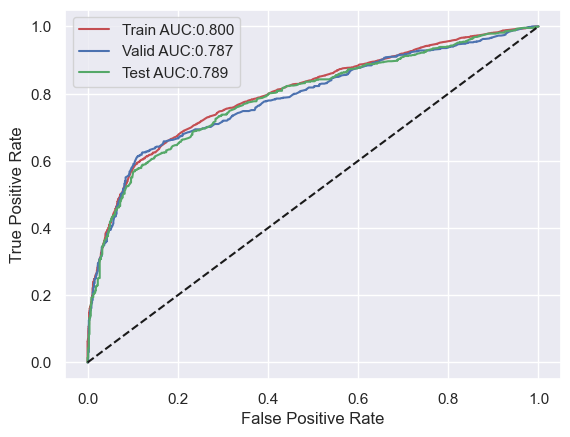

In [95]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [96]:
#Considering the overall performance on all metrics and sets, it seems that the LightGBM model may be the best choice.
#It achieves a good balance between AUC, accuracy, recall, precision, and F1 score on all sets.